# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [165]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

from scipy.stats import ks_2samp
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy

%matplotlib inline

In [166]:
renda = (pd.read_csv('https://raw.githubusercontent.com/tavoralex/projetos-curso/main/previsao_de_renda.csv')
         .dropna()
         .drop_duplicates())

renda.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [167]:
renda.info()
print(renda.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12090 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12090 non-null  object 
 1   id_cliente             12090 non-null  int64  
 2   sexo                   12090 non-null  object 
 3   posse_de_veiculo       12090 non-null  bool   
 4   posse_de_imovel        12090 non-null  bool   
 5   qtd_filhos             12090 non-null  int64  
 6   tipo_renda             12090 non-null  object 
 7   educacao               12090 non-null  object 
 8   estado_civil           12090 non-null  object 
 9   tipo_residencia        12090 non-null  object 
 10  idade                  12090 non-null  int64  
 11  tempo_emprego          12090 non-null  float64
 12  qt_pessoas_residencia  12090 non-null  float64
 13  renda                  12090 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [168]:
y, X = patsy.dmatrices('''np.log(renda) ~ sexo +
                                posse_de_veiculo +
                                posse_de_imovel +
                                qtd_filhos +
                                tipo_renda +
                                educacao +
                                estado_civil +
                                tipo_residencia +
                                idade +
                                tempo_emprego +
                                qt_pessoas_residencia''', data = renda, return_type="dataframe")

reg = sm.OLS(y, X).fit()
print(reg.summary())
print(f"AIC: {reg.aic:.2f}")

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:11   Log-Likelihood:                -13214.
No. Observations:               12090   AIC:                         2.648e+04
Df Residuals:                   12065   BIC:                         2.666e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [169]:
renda.columns

Index(['data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')

In [170]:
#1.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [171]:
#2.

alpha_list = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 

for a in alpha_list:
    reg = sm.OLS(y, X).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = a)

    print(reg.summary())
    print(f"AIC: {reg.aic:.2f}")

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:12   Log-Likelihood:                -13214.
No. Observations:               12090   AIC:                         2.648e+04
Df Residuals:                   12065   BIC:                         2.667e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:12   Log-Likelihood:                -13214.
No. Observations:               12090   AIC:                         2.648e+04
Df Residuals:                   12065   BIC:                         2.667e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:13   Log-Likelihood:                -13214.
No. Observations:               12090   AIC:                         2.648e+04
Df Residuals:                   12065   BIC:                         2.667e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#2.

Não houve diferenças entre os modelos com a regularização ridge.



In [172]:
for a in alpha_list:
    reg = sm.OLS(y, X).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.999999
                         , alpha = a)

    print(reg.summary())
    print(f"AIC: {reg.aic:.2f}")

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     268.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:13   Log-Likelihood:                -13214.
No. Observations:               12090   AIC:                         2.648e+04
Df Residuals:                   12065   BIC:                         2.667e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     650.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:14   Log-Likelihood:                -13285.
No. Observations:               12090   AIC:                         2.659e+04
Df Residuals:                   12080   BIC:                         2.667e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     1577.
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:14   Log-Likelihood:                -13349.
No. Observations:               12090   AIC:                         2.671e+04
Df Residuals:                   12086   BIC:                         2.675e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#3. 
Com a regularização Lasso, o modelo com menor Alpha se apresentou melhor, com menor AIC e maior R² e R² ajustado.

In [173]:
#4.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            print(included)
            print(worst_feature)
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included



In [174]:
variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  Intercept                      with p-value 0.0
#############
['Intercept']
Add  sexo[T.M]                      with p-value 0.0
#############
['Intercept', 'sexo[T.M]']
Add  tempo_emprego                  with p-value 0.0
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego']
Add  tipo_renda[T.Empresário]       with p-value 3.23324e-23
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]']
Add  educacao[T.Superior completo]  with p-value 9.91328e-16
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]']
Add  idade                          with p-value 2.5253e-13
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade']
Add  posse_de_imovel[T.True]        with p-value 6.75115e-10
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'posse_de_

In [175]:
X_test_stepwise = X_test[['sexo[T.M]', 'tempo_emprego', 'Intercept', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'posse_de_imovel[T.True]', 'qtd_filhos', 'posse_de_veiculo[T.True]', 'tipo_renda[T.Servidor público]']]

reg = sm.OLS(y_test, X_test_stepwise).fit()
print(f"AIC: {reg.aic:.2f}")
reg.summary()


AIC: 6643.30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          2.68e-293
Time:                        21:37:15   Log-Likelihood:                -3311.6
No. Observations:                3023   AIC:                             6643.
Df Residuals:                    3013   BIC:                             6703.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
sexo[T.M]                          0.7854      0.029     26.909      0.000       0.728       0.843
tempo_emprego                      0.0643      0.002     29.920      0.000       0.060       0.068
Intercept                          7.0604      0.071     99.627      0.000       6.921       7.199
tipo_renda[T.Empresário]           0.1303      0.030      4.276      0.000       0.071       0.190
educacao[T.Superior completo]      0.0866      0.028      3.137      0.002       0.032       0.141
idade                              0.0055      0.002      3.541      0.000       0.002       0.009
posse_de_imovel[T.True]            0.0986      0.028      3.527      0.000       0.044       0.153
qtd_filhos                         0.0526      0.018      2.876      0.004       0.017       0.088
posse_de_veiculo[T.True]           0.0700      0.028      2.462      0.014       0.014       0.126
tipo_renda[T.Servidor público]     0.0701      0.046      1.517      0.129      -0.021       0.161
==============================================================================
Omnibus:                        0.943   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.875
Skew:                          -0.018   Prob(JB):                        0.646
Kurtosis:                       3.075   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#4. O modelo Stepwise se mostrou melhor, pois manteve um R² elevado e conseguiu reduzir o AIC.

#5 O modelo Stepwise se mostrou o melhor dos três, pois deixou apenas as variáveis mais relevantes e houve um ganho de R² e um menor AIC, conforme dito no item 4.

In [176]:
#6.

y, X = patsy.dmatrices('''np.log(renda) ~ sexo +
                                qtd_filhos +
                                tipo_renda +
                                educacao +
                                estado_civil +
                                idade + I(idade**2)+
                                (qt_pessoas_residencia - qtd_filhos) +
                                tempo_emprego +
                                (idade/qtd_filhos) +
                                qt_pessoas_residencia''', data = renda, return_type="dataframe")

reg = sm.OLS(y, X).fit()
print(f"AIC: {reg.aic:.2f}")
reg.summary()

AIC: 26515.49


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     349.4
Date:                Sat, 03 Jun 2023   Prob (F-statistic):               0.00
Time:                        21:37:15   Log-Likelihood:                -13238.
No. Observations:               12090   AIC:                         2.652e+04
Df Residuals:                   12070   BIC:                         2.666e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.6028      0.263     25.079      0.000       6.087       7.119
sexo[T.M]                           0.8003      0.014     56.283      0.000       0.772       0.828
tipo_renda[T.Bolsista]              0.2330      0.242      0.963      0.335      -0.241       0.707
tipo_renda[T.Empresário]            0.1558      0.015     10.253      0.000       0.126       0.186
tipo_renda[T.Pensionista]          -0.3193      0.242     -1.319      0.187      -0.794       0.155
tipo_renda[T.Servidor público]      0.0578      0.023      2.560      0.010       0.014       0.102
educacao[T.Pós graduação]           0.1492      0.159      0.936      0.349      -0.163       0.461
educacao[T.Secundário]             -0.0135      0.072     -0.188      0.851      -0.155       0.128
educacao[T.Superior completo]       0.0990      0.072      1.368      0.171      -0.043       0.241
educacao[T.Superior incompleto]    -0.0477      0.078     -0.612      0.541      -0.201       0.105
estado_civil[T.Separado]            0.3213      0.112      2.879      0.004       0.103       0.540
estado_civil[T.Solteiro]            0.2667      0.109      2.441      0.015       0.053       0.481
estado_civil[T.União]              -0.0455      0.025     -1.790      0.073      -0.095       0.004
estado_civil[T.Viúvo]               0.3741      0.116      3.219      0.001       0.146       0.602
qtd_filhos                         -0.3161      0.120     -2.639      0.008      -0.551      -0.081
idade                               0.0051      0.006      0.798      0.425      -0.007       0.018
I(idade ** 2)                    2.549e-06   7.44e-05      0.034      0.973      -0.000       0.000
qt_pessoas_residencia               0.2984      0.108      2.761      0.006       0.087       0.510
tempo_emprego                       0.0613      0.001     58.191      0.000       0.059       0.063
idade:qtd_filhos                    0.0013      0.001      0.986      0.324      -0.001       0.004
==============================================================================
Omnibus:                        0.709   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.702   Jarque-Bera (JB):                0.697
Skew:                           0.018   Prob(JB):                        0.706
Kurtosis:                       3.007   Cond. No.                     9.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [178]:
variaveis = stepwise_selection(X, y)

print('resulting features:')
print(variaveis)

Add  Intercept                      with p-value 0.0
#############
['Intercept']
Add  sexo[T.M]                      with p-value 0.0
#############
['Intercept', 'sexo[T.M]']
Add  tempo_emprego                  with p-value 0.0
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego']
Add  tipo_renda[T.Empresário]       with p-value 3.23324e-23
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]']
Add  educacao[T.Superior completo]  with p-value 9.91328e-16
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]']
Add  idade                          with p-value 2.5253e-13
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade']
Add  idade:qtd_filhos               with p-value 8.50562e-05
#############
['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'idade:qtd

In [179]:
X_test = X_test[['Intercept', 'sexo[T.M]', 'tempo_emprego', 'tipo_renda[T.Empresário]', 'educacao[T.Superior completo]', 'idade', 'idade:qtd_filhos', 'tipo_renda[T.Servidor público]']]

In [180]:
reg = sm.OLS(y_test, X_test).fit()
print(f"AIC: {reg.aic:.2f}")
reg.summary()

AIC: 6657.36


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     247.7
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          8.44e-292
Time:                        21:37:16   Log-Likelihood:                -3320.7
No. Observations:                3023   AIC:                             6657.
Df Residuals:                    3015   BIC:                             6705.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.1359      0.068    105.219      0.000       7.003       7.269
sexo[T.M]                          0.8009      0.028     28.818      0.000       0.746       0.855
tempo_emprego                      0.0638      0.002     29.641      0.000       0.060       0.068
tipo_renda[T.Empresário]           0.1317      0.031      4.314      0.000       0.072       0.192
educacao[T.Superior completo]      0.0945      0.028      3.427      0.001       0.040       0.149
idade                              0.0057      0.002      3.762      0.000       0.003       0.009
idade:qtd_filhos                   0.0016      0.000      3.428      0.001       0.001       0.003
tipo_renda[T.Servidor público]     0.0661      0.046      1.426      0.154      -0.025       0.157
==============================================================================
Omnibus:                        1.057   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.987
Skew:                          -0.026   Prob(JB):                        0.611
Kurtosis:                       3.072   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#6. Não houve melhora significativa com as transformações tentadas.

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=100)

In [182]:
#7. Ajustando uma árvore de regressão:

regr = DecisionTreeRegressor(max_depth=4, min_samples_leaf=8)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [183]:
print('R²:', sm.OLS(y_test, X_test).fit().rsquared)
sm.OLS(y_test, X_test).fit().summary()

R²: 0.3674472052205705


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     91.81
Date:                Sat, 03 Jun 2023   Prob (F-statistic):          3.90e-281
Time:                        21:37:16   Log-Likelihood:                -3315.0
No. Observations:                3023   AIC:                             6670.
Df Residuals:                    3003   BIC:                             6790.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           6.9356      0.490     14.165      0.000       5.976       7.896
sexo[T.M]                           0.7993      0.028     28.113      0.000       0.744       0.855
tipo_renda[T.Bolsista]              0.1933      0.365      0.530      0.596      -0.522       0.909
tipo_renda[T.Empresário]            0.1344      0.031      4.383      0.000       0.074       0.195
tipo_renda[T.Pensionista]           0.5606      0.728      0.770      0.441      -0.866       1.987
tipo_renda[T.Servidor público]      0.0652      0.046      1.405      0.160      -0.026       0.156
educacao[T.Pós graduação]          -0.0633      0.294     -0.216      0.829      -0.639       0.512
educacao[T.Secundário]             -0.1556      0.141     -1.100      0.271      -0.433       0.122
educacao[T.Superior completo]      -0.0695      0.142     -0.490      0.624      -0.348       0.209
educacao[T.Superior incompleto]    -0.2571      0.153     -1.678      0.093      -0.557       0.043
estado_civil[T.Separado]            0.3603      0.204      1.770      0.077      -0.039       0.759
estado_civil[T.Solteiro]            0.3510      0.198      1.769      0.077      -0.038       0.740
estado_civil[T.União]              -0.0400      0.052     -0.765      0.444      -0.142       0.062
estado_civil[T.Viúvo]               0.4222      0.212      1.988      0.047       0.006       0.839
qtd_filhos                         -0.4301      0.223     -1.931      0.054      -0.867       0.007
idade                              -0.0089      0.013     -0.702      0.483      -0.034       0.016
I(idade ** 2)                       0.0002      0.000      1.080      0.280      -0.000       0.000
qt_pessoas_residencia               0.3374      0.195      1.734      0.083      -0.044       0.719
tempo_emprego                       0.0640      0.002     29.651      0.000       0.060       0.068
idade:qtd_filhos                    0.0042      0.003      1.494      0.135      -0.001       0.010
==============================================================================
Omnibus:                        0.634   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.565
Skew:                          -0.017   Prob(JB):                        0.754
Kurtosis:                       3.058   Cond. No.                     1.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

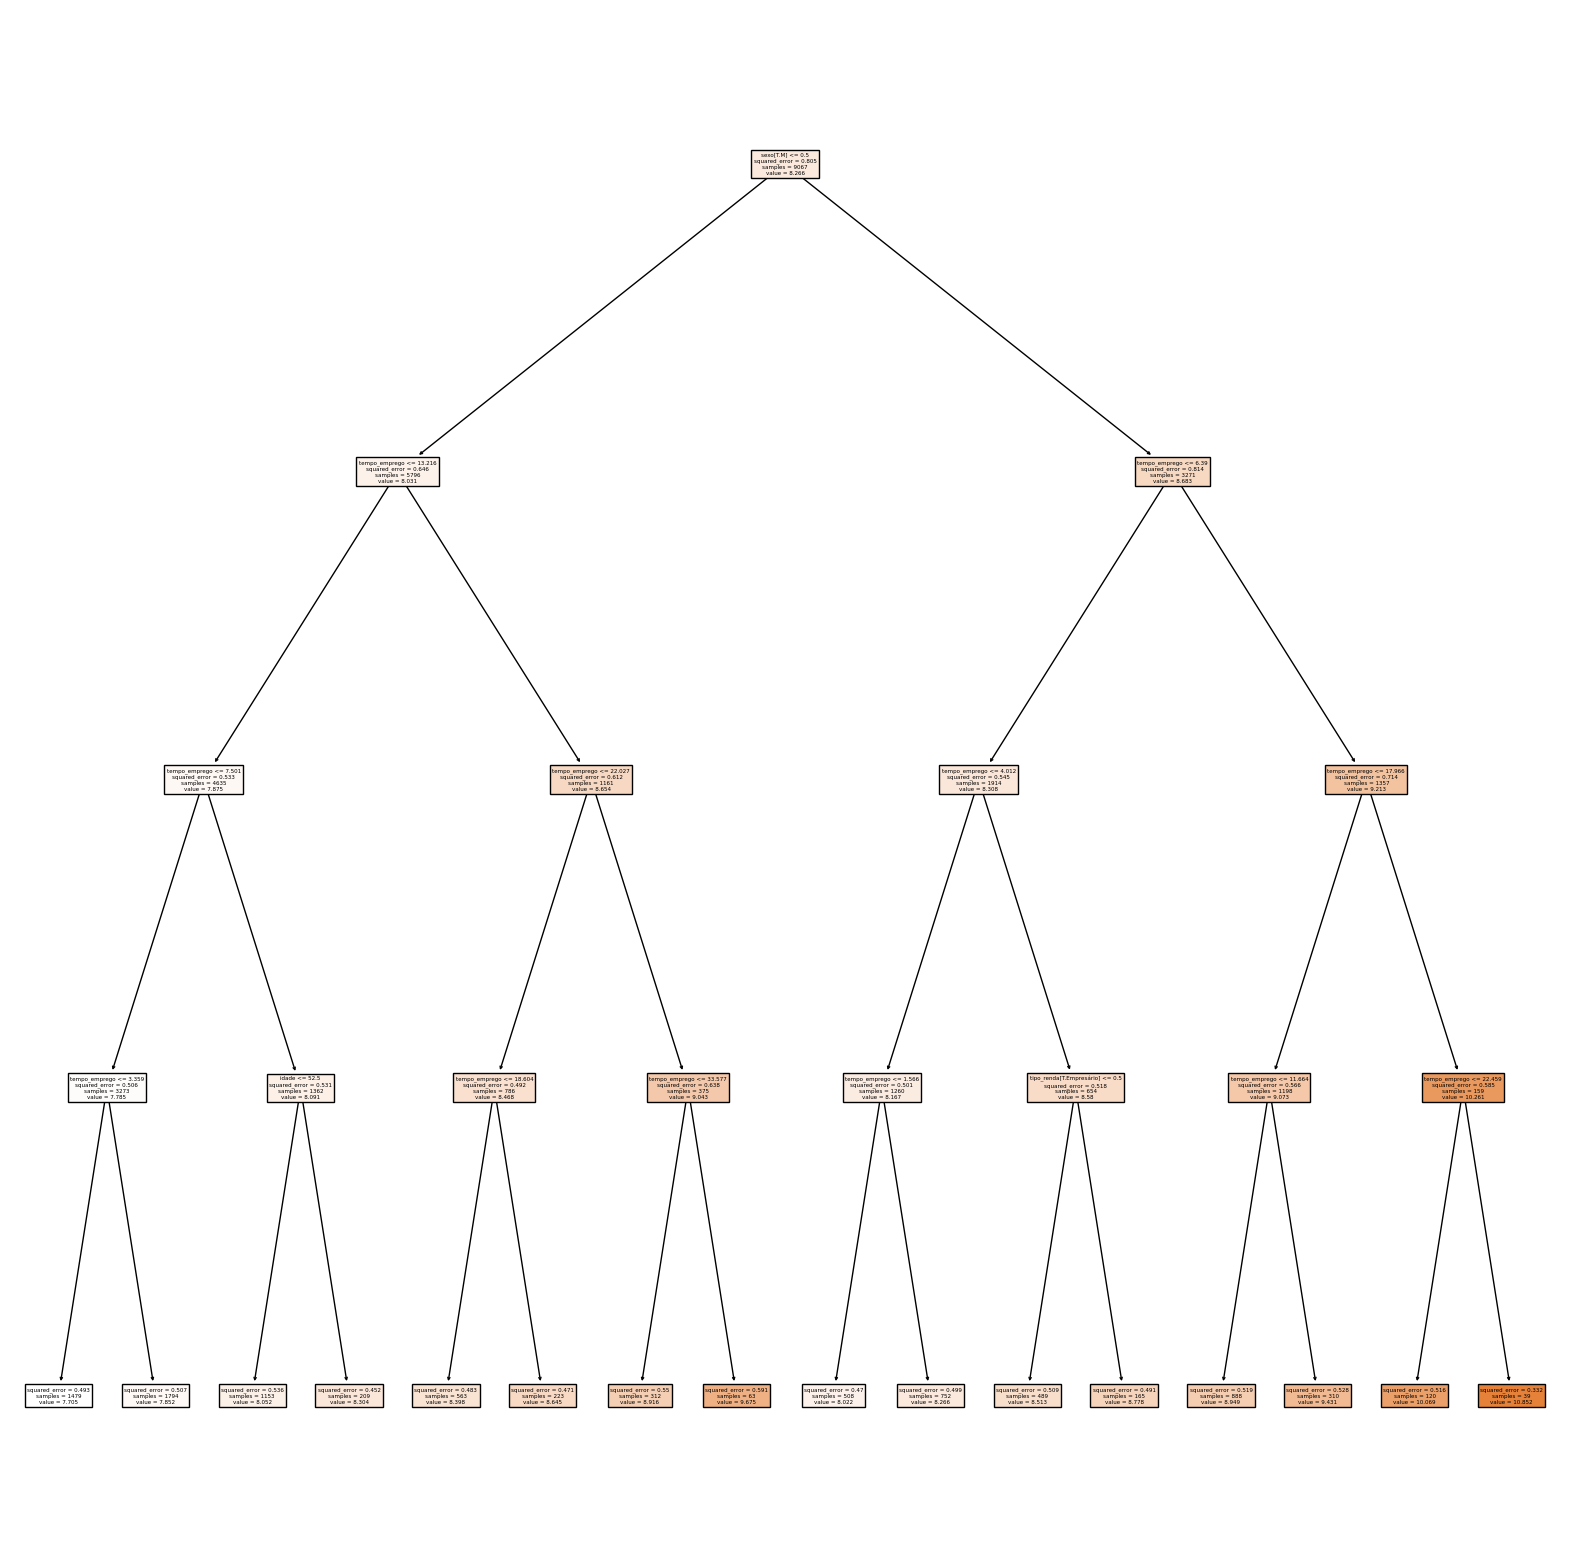

In [184]:
plt.rc('figure', figsize = (20,20))
tp = tree.plot_tree(regr,
                   feature_names = X_train.columns,
                   filled = True)

#7. Não houveram mudanças significativas com a árvore de regressão.